<a href="https://colab.research.google.com/github/clemencia/ML4PPGF_UERJ/blob/master/Demostracao_CentralLimit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# O teorema do limite central

Este teorema diz que a medida que o tamanho de uma amostra cresce,  a distribuiçao das _médias_ das medições vai se aproximando a uma distribuição normal.

Por exemplo, se o experimento for jogar um dado N vezes e avaliar a média dos resultados. Se o dado for "justo" a média deveria se aproximar de $3.5$. O experimento (jogar o dado N vezes) pode ser repetido p.ex. 10000 vezes e a distribuição das médias deve ser aproximar de uma distribuição normal a medida que N (o tamanho da amostra em cada experimento) cresce.

10x --> media: 3.500 desvio padrão: 0.538
50x --> media: 3.502 desvio padrão: 0.243


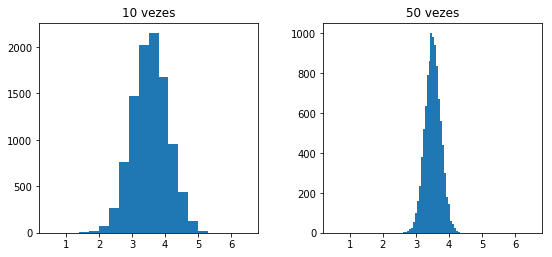

In [2]:
# demonstration of the central limit theorem ( Dice Rolling )
from numpy.random import randint,random
from numpy import mean, std
from matplotlib import pyplot as plt

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# number of rolls
nrolls=10
# number of nexp 
nexp = 10000
# number of bins
nbins = 20
# calculate the mean of nrolls dice rolls for nexp times
means = [mean(randint(1, 7, nrolls)) for i in range(nexp)]
# plot the distribution of sample means
ax1.hist(means,nbins, range=(0.5,6.5))
ax1.set_title("10 vezes")
print("10x --> media: {0:4.3f} desvio padrão: {1:2.3f}".format(mean(means),std(means)))


nrolls=50
nbins=100
means2 = [mean(randint(1, 7, nrolls)) for i in range(nexp)] ##prob. uniforme de 6 possiveis valores discretos
ax2.hist(means2,nbins, range=(0.5,6.5))
ax2.set_title("50 vezes")
print("50x --> media: {0:4.3f} desvio padrão: {1:2.3f}".format(mean(means2),std(means2)))
plt.subplots_adjust(bottom=0.15, wspace=0.3)
plt.show()

Para uma distribuição uniforme contínua (valor no intervalo $[0,1)$) podemos ver também o que acontece com a média a medida que a amostra cresce.

Para os experimentos com 1 variável na amostra a distribuição é plana, ou seja equivale a distribuição uniforme. 

N = 1 --> Média = 0.510 desvio padrão = 0.292
N = 2 --> Média = 0.500 desvio padrão = 0.206
N = 10 --> Média = 0.500 desvio padrão = 0.091
N = 100 --> Média = 0.500 desvio padrão = 0.028


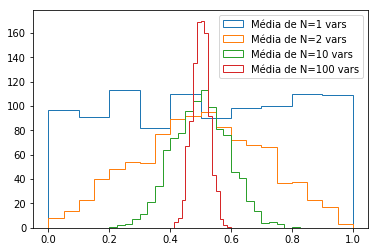

In [3]:
# demonstration of the central limit theorem ( Uniform Distribution )


# number of random variables in each sample
nrand=[1, 2 ,10, 100 ]

# number of experiments 
nexp = 1000
# number of bins
nbins = [10, 20 , 40 , 80 ]

means={}
# calculate the mean of nrand variables nexp times #each variable uniformly distributed between 0 and 1
for i,n in enumerate(nrand) :
  means[n] = [mean(random(n)) for i in range(nexp)] 
  # plot the distribution of sample means
  plt.hist(means[n],nbins[i], range=(0,1),label="Média de N="+str(n)+" vars",histtype="step")
  #plt.show()
  print("N = {:d} --> Média = {:4.3f} desvio padrão = {:2.3f}".format(n,mean(means[n]),std(means[n])))



plt.legend(loc="upper right")
plt.show()

A média da distribuições das médias tem sempre um valor perto de $0.5$, mas o valor do desvio padrão nessa distribuição vai diminuindo a medida que o tamanho da amostra cresce.

Agora, se simplesmente  graficamos a distribuição (normalizada) para  $N=100$ e $N=10$ variáveis, junto das funções de distribuição de probabilidade gaussianas com $\mu = 0.50$ e $\sigma = 0.03$ e  $\mu = 0.50$ e $\sigma = 0.09$ , é possível observar como as distribuições das médias estão bem aproximadas pelas funções gaussianas.


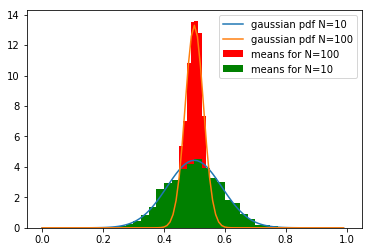

In [4]:
from scipy.stats import norm
import numpy as np

x_all = np.arange(0,1,0.01)

y_all = norm.pdf(x_all,0.50,0.03)
y_all10 = norm.pdf(x_all,0.50,0.09)
plt.plot(x_all,y_all10,label="gaussian pdf N=10")
plt.plot(x_all,y_all,label="gaussian pdf N=100")

plt.hist(means[100],80, range=(0,1),label="means for N=100",color="red",density=True)
plt.hist(means[10],40, range=(0,1),label="means for N=10",color="green",density=True)
plt.legend(loc="upper right")
plt.show()


É possível apreciar o efeito já a partir de amostras de $N=2$.



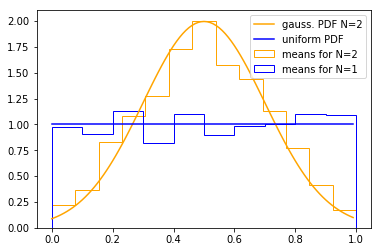

In [6]:
x_all = np.arange(0,1,0.01)

y_all = np.full(100,1)
y_all10 = norm.pdf(x_all,0.5,0.2)
plt.plot(x_all,y_all10,label="gauss. PDF N=2",color="orange")
plt.plot(x_all,y_all,label="uniform PDF",color="blue")

plt.hist(means[2],13, range=(0.,1),label="means for N=2",color="orange",density=True,histtype="step")
plt.hist(means[1],10, range=(0.,1),label="means for N=1",color="blue",density=True,histtype="step")
plt.legend(loc="upper right")
plt.show()